<a href="https://colab.research.google.com/github/yogapatangga/MachineLearningTasks/blob/main/2ndWeekTasks/Logistic_Model_Citarum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Model (Citarum Water)
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Citarum dataset and display the first few rows

In [2]:
dataset = pd.read_csv('CitarumWater.csv')
print(dataset.head())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


## Feature selection

In [30]:
columns_to_drop = ["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2"]
X = dataset.drop(columns=columns_to_drop)  # Features
y = dataset["Class"]   # Target

## Balancing imbalanced data

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

- SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class.

## Splitting the dataset into the Training set and Test set (70:30)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

## Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

## Predicting the Test set results

In [41]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix and print the classification report

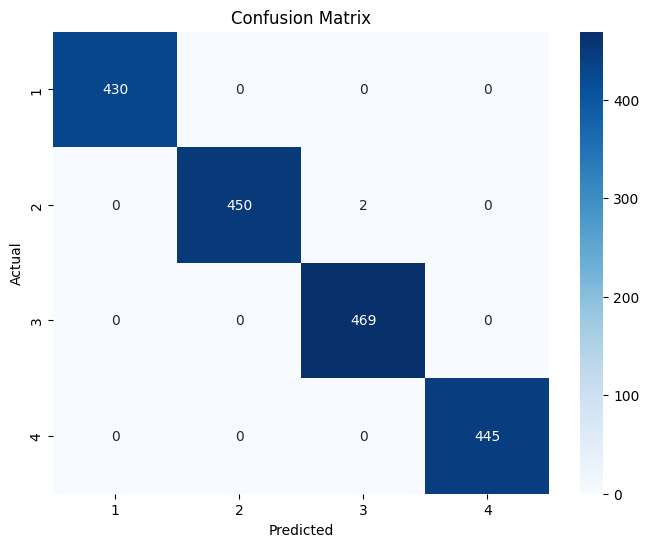

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       452
           3       1.00      1.00      1.00       469
           4       1.00      1.00      1.00       445

    accuracy                           1.00      1796
   macro avg       1.00      1.00      1.00      1796
weighted avg       1.00      1.00      1.00      1796


Accuracy: 99.89%


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")